<a href="https://colab.research.google.com/github/AnushaUKumar/AnushaUKumar/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **1. Load and Explore MNIST Dataset**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Labels: (60000,)
Testing data shape: (10000, 28, 28), Labels: (10000,)


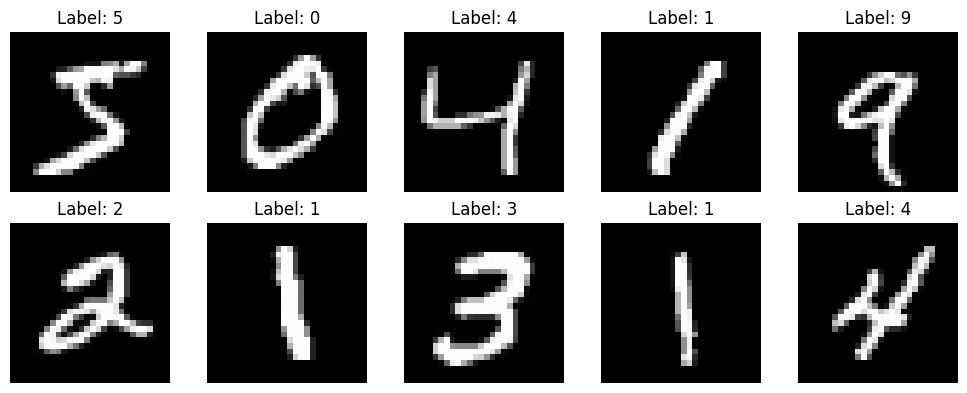

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Show the shape
print(f"Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Labels: {y_test.shape}")

# Visualize some digits
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


**2. Preprocess the Data**

In [3]:
# Normalize to [0, 1] and reshape to (28, 28, 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


**3. Build the CNN Model**

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**4.Train the Model**

In [5]:
history = model.fit(X_train, y_train_cat,
                    validation_data=(X_test, y_test_cat),
                    epochs=10,
                    batch_size=128,
                    verbose=2)


Epoch 1/10
469/469 - 43s - 92ms/step - accuracy: 0.9102 - loss: 0.2930 - val_accuracy: 0.9815 - val_loss: 0.0600
Epoch 2/10
469/469 - 40s - 84ms/step - accuracy: 0.9721 - loss: 0.0950 - val_accuracy: 0.9861 - val_loss: 0.0426
Epoch 3/10
469/469 - 42s - 89ms/step - accuracy: 0.9799 - loss: 0.0681 - val_accuracy: 0.9894 - val_loss: 0.0317
Epoch 4/10
469/469 - 40s - 86ms/step - accuracy: 0.9829 - loss: 0.0572 - val_accuracy: 0.9895 - val_loss: 0.0327
Epoch 5/10
469/469 - 41s - 87ms/step - accuracy: 0.9852 - loss: 0.0468 - val_accuracy: 0.9892 - val_loss: 0.0329
Epoch 6/10
469/469 - 40s - 86ms/step - accuracy: 0.9880 - loss: 0.0404 - val_accuracy: 0.9904 - val_loss: 0.0288
Epoch 7/10
469/469 - 40s - 86ms/step - accuracy: 0.9887 - loss: 0.0353 - val_accuracy: 0.9910 - val_loss: 0.0279
Epoch 8/10
469/469 - 40s - 86ms/step - accuracy: 0.9904 - loss: 0.0322 - val_accuracy: 0.9910 - val_loss: 0.0271
Epoch 9/10
469/469 - 40s - 86ms/step - accuracy: 0.9907 - loss: 0.0289 - val_accuracy: 0.9917 - 

**5. Evaluate the Model**

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9898 - loss: 0.0313
Test accuracy: 0.9924


**6. Predict and Visualize Results**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


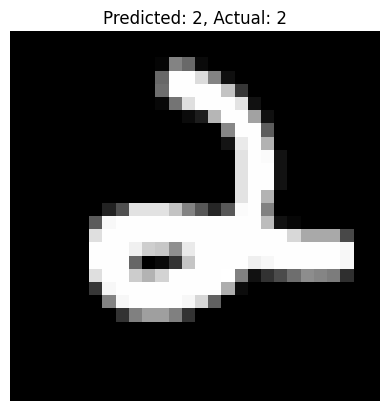

In [7]:
import random

# Pick a random test sample
index = random.randint(0, len(X_test) - 1)
sample_image = X_test[index].reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

# Show image and prediction
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}, Actual: {y_test[index]}")
plt.axis('off')
plt.show()
